In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

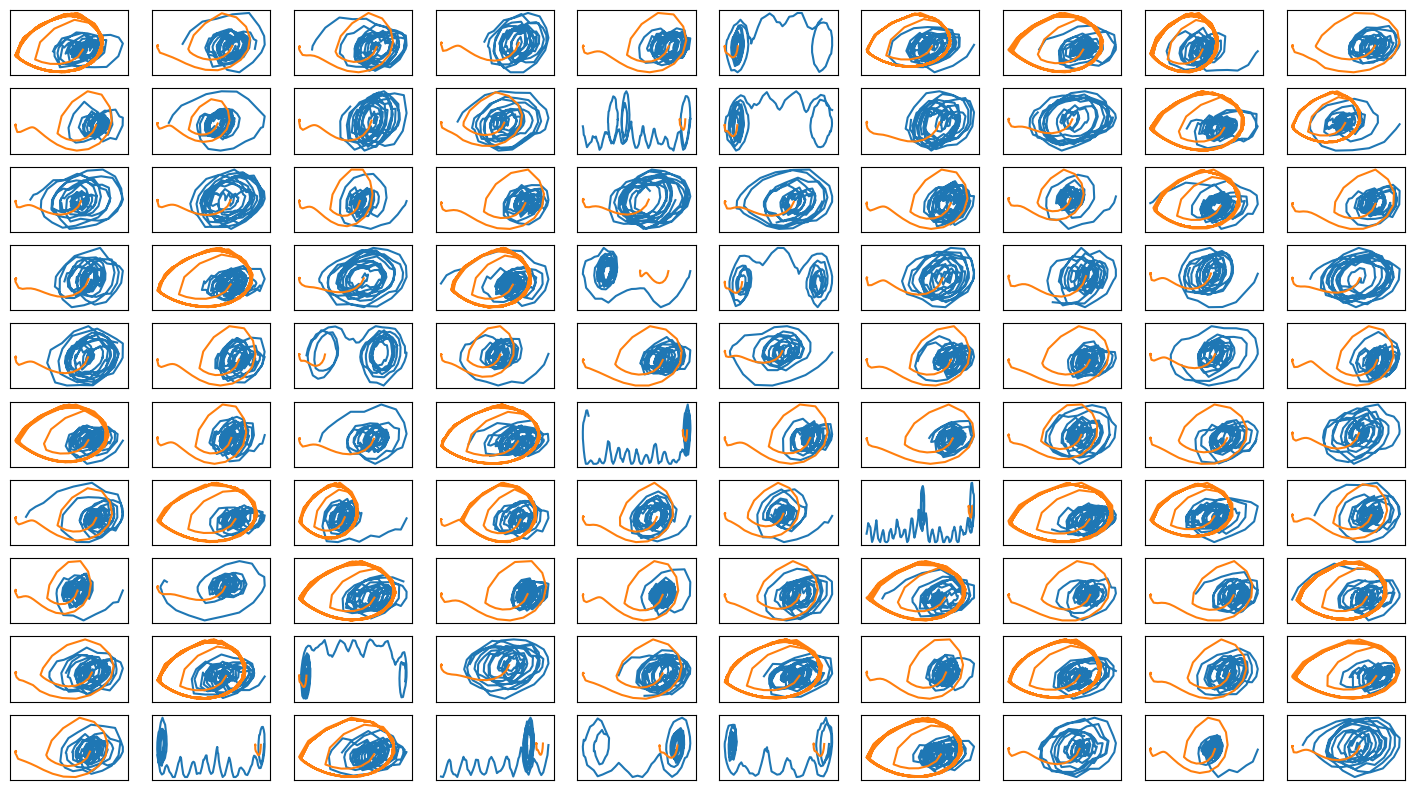

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
# train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
# vi.update_mulogvar_offlinedata()
# vi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)
# plt.ylim([-2000, 1000])
# plt.show()

# train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
# vi.update_mulogvar_offlinedata()
# vi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)
# #
# #plt.show()

# train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
# vi.update_mulogvar_offlinedata()
# vi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)

# # y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# # y_max = min(1000, max(min(train_curve),min(valid_curve)))
# # plt.ylim([y_min, y_max])
# plt.show()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

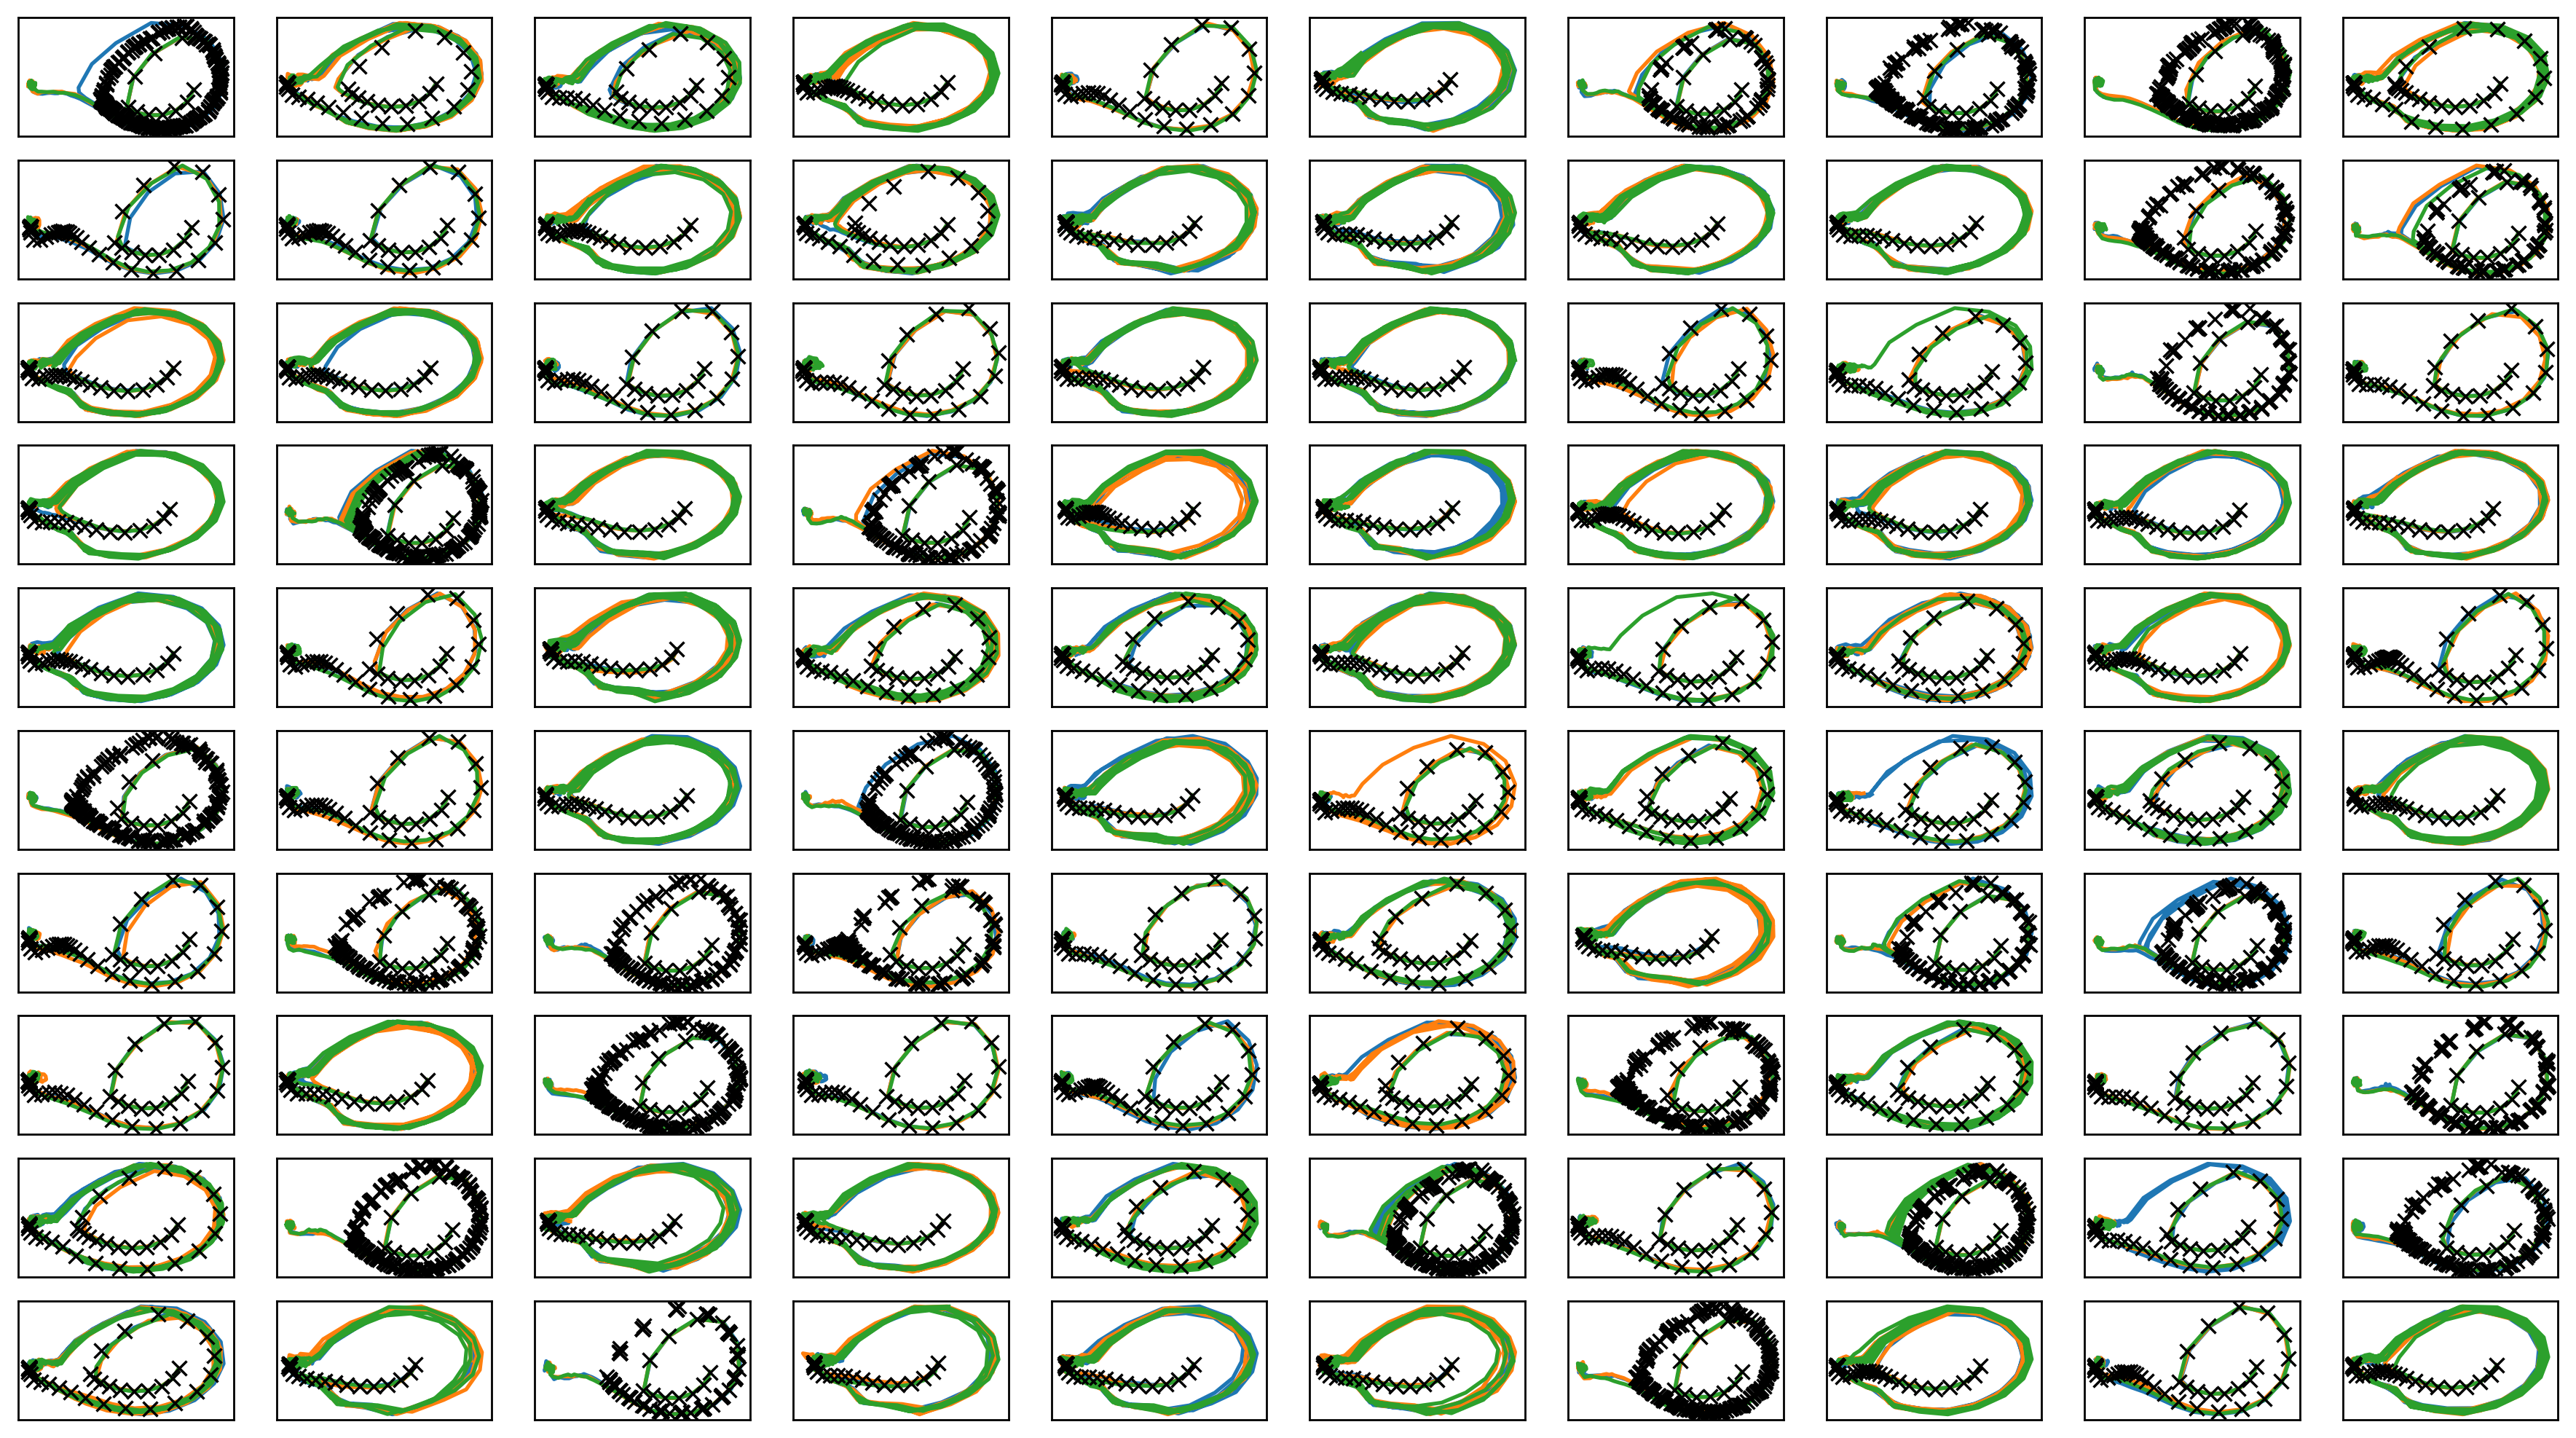

In [11]:
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

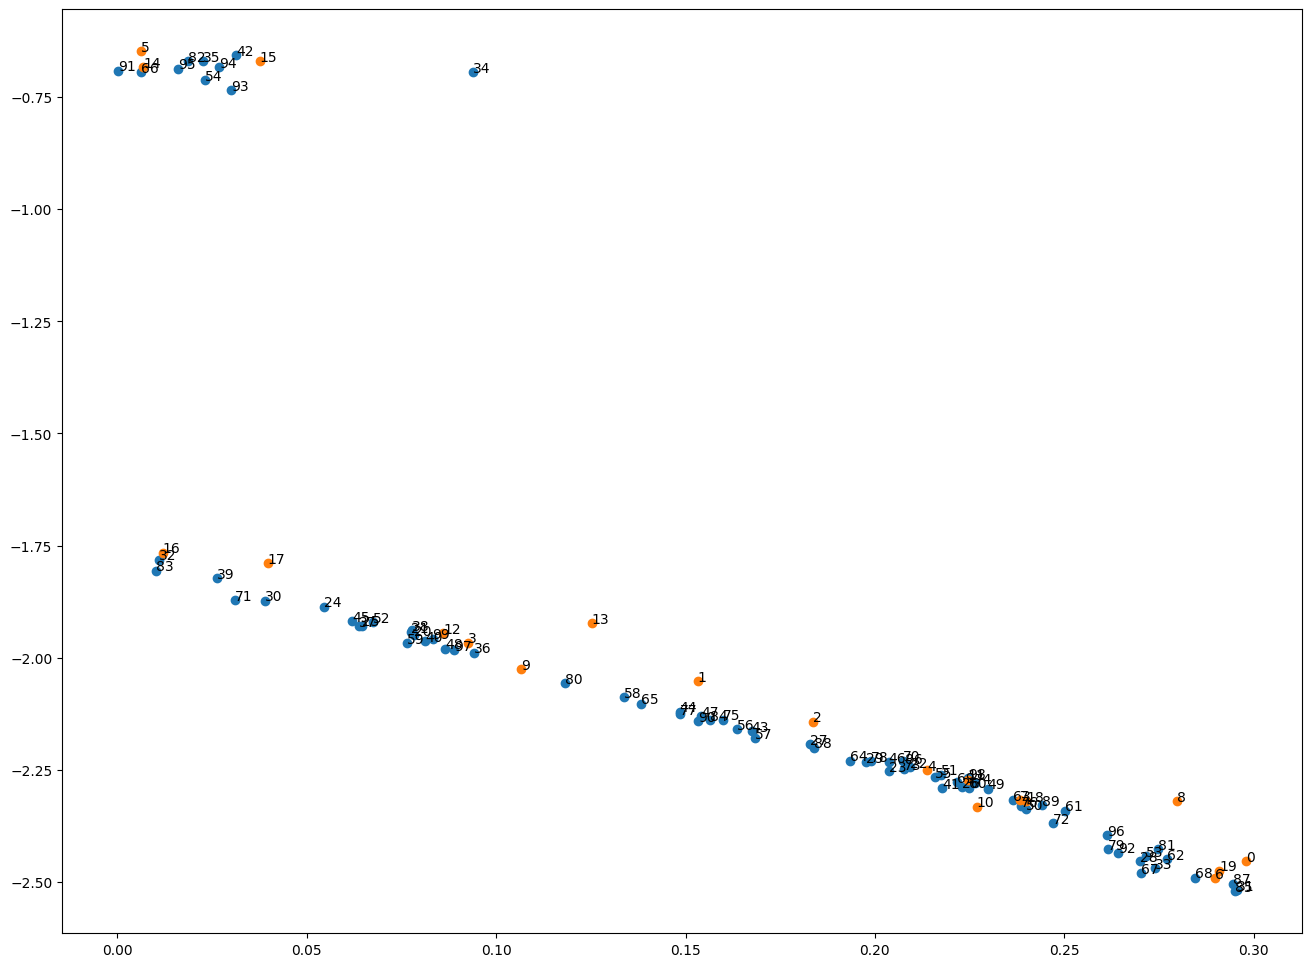

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_offlinedata)):
    np_mulogvar.append(vi.mulogvar_offlinedata[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


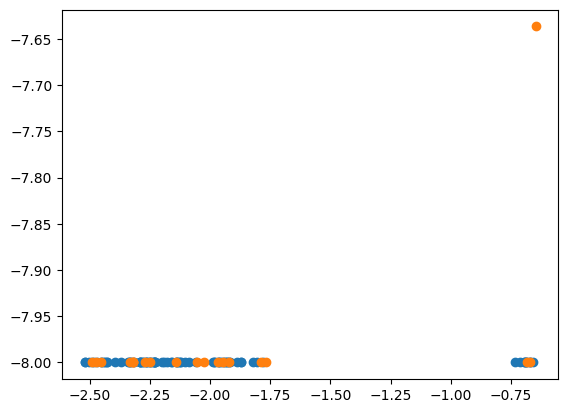

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-25 21:23:47.283774


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 2.93448  validloss 2.97361±0.00000  bestvalidloss 2.97361  last_update 0
train: iter 1  trainloss 2.71908  validloss 2.73874±0.00000  bestvalidloss 2.73874  last_update 0
train: iter 2  trainloss 2.52410  validloss 2.53435±0.00000  bestvalidloss 2.53435  last_update 0
train: iter 3  trainloss 2.38046  validloss 2.39039±0.00000  bestvalidloss 2.39039  last_update 0
train: iter 4  trainloss 2.25751  validloss 2.26730±0.00000  bestvalidloss 2.26730  last_update 0
train: iter 5  trainloss 2.14881  validloss 2.14235±0.00000  bestvalidloss 2.14235  last_update 0
train: iter 6  trainloss 2.06228  validloss 2.05658±0.00000  bestvalidloss 2.05658  last_update 0
train: iter 7  trainloss 1.98431  validloss 1.97741±0.00000  bestvalidloss 1.97741  last_update 0
train: iter 8  trainloss 1.92041  validloss 1.91381±0.00000  bestvalidloss 1.91381  last_update 0
train: iter 9  trainloss 1.86049  validloss 1.85378±0.00000  bestvalidloss 1.85378  last_update 0
train: iter 10  trai

train: iter 83  trainloss 0.78462  validloss 0.88797±0.00000  bestvalidloss 0.85866  last_update 27
train: iter 84  trainloss 0.78442  validloss 0.87225±0.00000  bestvalidloss 0.85866  last_update 28
train: iter 85  trainloss 0.79048  validloss 0.88140±0.00000  bestvalidloss 0.85866  last_update 29
train: iter 86  trainloss 0.78442  validloss 0.87564±0.00000  bestvalidloss 0.85866  last_update 30
train: iter 87  trainloss 0.78302  validloss 0.88498±0.00000  bestvalidloss 0.85866  last_update 31
train: iter 88  trainloss 0.78554  validloss 0.86299±0.00000  bestvalidloss 0.85866  last_update 32
train: iter 89  trainloss 0.78100  validloss 0.87666±0.00000  bestvalidloss 0.85866  last_update 33
train: iter 90  trainloss 0.78830  validloss 0.86971±0.00000  bestvalidloss 0.85866  last_update 34
train: iter 91  trainloss 0.78382  validloss 0.86765±0.00000  bestvalidloss 0.85866  last_update 35
train: iter 92  trainloss 0.78265  validloss 0.90099±0.00000  bestvalidloss 0.85866  last_update 36


train: iter 167  trainloss 0.78824  validloss 0.88699±0.00000  bestvalidloss 0.85524  last_update 54
train: iter 168  trainloss 0.79137  validloss 0.87201±0.00000  bestvalidloss 0.85524  last_update 55
train: iter 169  trainloss 0.77427  validloss 0.87571±0.00000  bestvalidloss 0.85524  last_update 56
train: iter 170  trainloss 0.77963  validloss 0.90215±0.00000  bestvalidloss 0.85524  last_update 57
train: iter 171  trainloss 0.78632  validloss 0.88735±0.00000  bestvalidloss 0.85524  last_update 58
train: iter 172  trainloss 0.77470  validloss 0.88943±0.00000  bestvalidloss 0.85524  last_update 59
train: iter 173  trainloss 0.78004  validloss 0.89049±0.00000  bestvalidloss 0.85524  last_update 60
train: iter 174  trainloss 0.77581  validloss 0.88306±0.00000  bestvalidloss 0.85524  last_update 61
train: iter 175  trainloss 0.78147  validloss 0.87899±0.00000  bestvalidloss 0.85524  last_update 62
train: iter 176  trainloss 0.77979  validloss 0.88369±0.00000  bestvalidloss 0.85524  last_

In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.9976, -1.2711], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_offlinedata)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])

In [19]:
vi.get_belief()

tensor([-1.9976, -1.2711])

In [46]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                #  vi.initial_belief.detach()[:self.z_dim],
                #  vi.initial_belief.detach()[self.z_dim:])
                 vi.prior[:vi.z_dim],
                 vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

0 Parameter containing:
tensor([-1.9976, -1.2711], requires_grad=True)
1 Parameter containing:
tensor([-1.9986, -1.2701], requires_grad=True)
2 Parameter containing:
tensor([-1.9995, -1.2691], requires_grad=True)
3 Parameter containing:
tensor([-1.9999, -1.2681], requires_grad=True)
4 Parameter containing:
tensor([-2.0003, -1.2672], requires_grad=True)
5 Parameter containing:
tensor([-2.0008, -1.2665], requires_grad=True)
6 Parameter containing:
tensor([-2.0014, -1.2658], requires_grad=True)
7 Parameter containing:
tensor([-2.0018, -1.2652], requires_grad=True)
8 Parameter containing:
tensor([-2.0022, -1.2647], requires_grad=True)
9 Parameter containing:
tensor([-2.0025, -1.2644], requires_grad=True)
10 Parameter containing:
tensor([-2.0027, -1.2640], requires_grad=True)
11 Parameter containing:
tensor([-2.0028, -1.2636], requires_grad=True)
12 Parameter containing:
tensor([-2.0028, -1.2631], requires_grad=True)
13 Parameter containing:
tensor([-2.0028, -1.2629], requires_grad=True)
14

11 Parameter containing:
tensor([-2.0026, -1.2658], requires_grad=True)
12 Parameter containing:
tensor([-2.0027, -1.2655], requires_grad=True)
13 Parameter containing:
tensor([-2.0029, -1.2653], requires_grad=True)
14 Parameter containing:
tensor([-2.0030, -1.2651], requires_grad=True)
15 Parameter containing:
tensor([-2.0032, -1.2650], requires_grad=True)
16 Parameter containing:
tensor([-2.0033, -1.2650], requires_grad=True)
17 Parameter containing:
tensor([-2.0032, -1.2652], requires_grad=True)
18 Parameter containing:
tensor([-2.0032, -1.2653], requires_grad=True)
19 Parameter containing:
tensor([-2.0031, -1.2653], requires_grad=True)
20 Parameter containing:
tensor([-2.0028, -1.2654], requires_grad=True)
21 Parameter containing:
tensor([-2.0027, -1.2656], requires_grad=True)
22 Parameter containing:
tensor([-2.0025, -1.2656], requires_grad=True)
23 Parameter containing:
tensor([-2.0023, -1.2656], requires_grad=True)
24 Parameter containing:
tensor([-2.0023, -1.2656], requires_gra

172 Parameter containing:
tensor([-2.0613, -1.2648], requires_grad=True)
173 Parameter containing:
tensor([-2.0616, -1.2646], requires_grad=True)
174 Parameter containing:
tensor([-2.0619, -1.2645], requires_grad=True)
175 Parameter containing:
tensor([-2.0621, -1.2646], requires_grad=True)
176 Parameter containing:
tensor([-2.0622, -1.2644], requires_grad=True)
177 Parameter containing:
tensor([-2.0622, -1.2643], requires_grad=True)
178 Parameter containing:
tensor([-2.0624, -1.2642], requires_grad=True)
179 Parameter containing:
tensor([-2.0626, -1.2641], requires_grad=True)
180 Parameter containing:
tensor([-2.0627, -1.2641], requires_grad=True)
181 Parameter containing:
tensor([-2.0631, -1.2641], requires_grad=True)
182 Parameter containing:
tensor([-2.0634, -1.2640], requires_grad=True)
183 Parameter containing:
tensor([-2.0638, -1.2640], requires_grad=True)
184 Parameter containing:
tensor([-2.0642, -1.2641], requires_grad=True)
185 Parameter containing:
tensor([-2.0645, -1.2641]

112 Parameter containing:
tensor([-2.0360, -1.2774], requires_grad=True)
113 Parameter containing:
tensor([-2.0366, -1.2773], requires_grad=True)
114 Parameter containing:
tensor([-2.0370, -1.2774], requires_grad=True)
115 Parameter containing:
tensor([-2.0375, -1.2775], requires_grad=True)
116 Parameter containing:
tensor([-2.0379, -1.2776], requires_grad=True)
117 Parameter containing:
tensor([-2.0383, -1.2776], requires_grad=True)
118 Parameter containing:
tensor([-2.0385, -1.2781], requires_grad=True)
119 Parameter containing:
tensor([-2.0389, -1.2785], requires_grad=True)
120 Parameter containing:
tensor([-2.0392, -1.2789], requires_grad=True)
121 Parameter containing:
tensor([-2.0396, -1.2792], requires_grad=True)
122 Parameter containing:
tensor([-2.0398, -1.2797], requires_grad=True)
123 Parameter containing:
tensor([-2.0400, -1.2802], requires_grad=True)
124 Parameter containing:
tensor([-2.0403, -1.2807], requires_grad=True)
125 Parameter containing:
tensor([-2.0406, -1.2811]

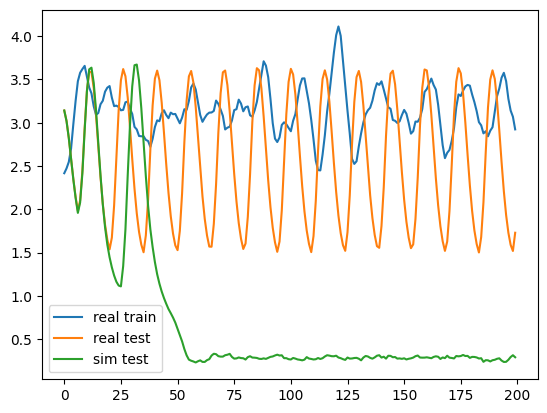

encoder [-2.454214 -8.      ]
real train tensor([-2.0093, -1.2469])
real test tensor([-2.0447, -1.2630])
sim tensor([-2.0093, -1.2822])


In [47]:
i = 0


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()

print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

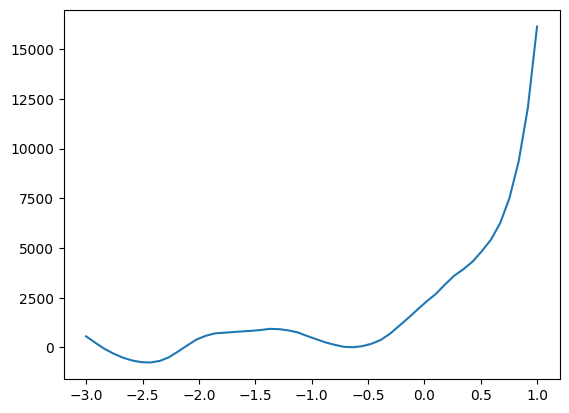

In [48]:
z_array = np.linspace(-3,1)
nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
plt.plot(z_array, nll_list)

In [49]:
print(torch.max(vi.mulogvar_offlinedata, axis=0)[0] - torch.min(vi.mulogvar_offlinedata, axis=0)[0])

tensor([1.8729, 0.3633])
